In [29]:
import speech_recognition as sr
import pyttsx3 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag
from collections import Counter
from pydub import AudioSegment
import matplotlib.pyplot as plt
import spacy
from spacy import displacy

In [10]:
# Initialize the recognizer 
r = sr.Recognizer() 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/sachin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sachin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sachin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
# Function to convert text to speech
def SpeakText(command):
    # Initialize the engine
    engine = pyttsx3.init()
    engine.say(command) 
    engine.runAndWait()

In [4]:
# Function to perform text processing tasks
def process_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Stopwords removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Parts of speech tagging
    pos_tags = pos_tag(filtered_tokens)
    
    # Stemming
    porter = PorterStemmer()
    stemmed_tokens = [porter.stem(word) for word in filtered_tokens]
    
    # Word frequency and count
    word_freq = Counter(stemmed_tokens)
    
    return word_freq

In [12]:
# Function to extract text from an mp3 file
def extract_text_from_mp3(mp3_file):
    # Convert MP3 to WAV
    audio = AudioSegment.from_mp3(mp3_file)
    wav_file = "temp.wav"
    audio.export(wav_file, format="wav")

    # Extract text from WAV
    with sr.AudioFile(wav_file) as source:
        audio = r.record(source) # Record the entire audio file
        text = r.recognize_google(audio)
        return text

In [21]:
# Function to visualize word frequency
def visualize_word_frequency(word_freq):
    # Extract words and their frequencies
    words = list(word_freq.keys())
    frequencies = list(word_freq.values())

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Word Frequency Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [31]:
# Path to the mp3 file
mp3_file_path = "Record (online-voice-recorder.com).mp3"

In [32]:
# Extract text from mp3 file
extracted_text = extract_text_from_mp3(mp3_file_path)

In [33]:
extracted_text

'Apple is a company founded by Steve Jobs'

In [34]:
# Load the English NER model from SpaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(extracted_text)

In [35]:
displacy.render(doc, style="ent", jupyter=True)

In [36]:
# Perform text processing tasks
processed_text = process_text(extracted_text)

In [37]:
processed_text

Counter({'appl': 1, 'compani': 1, 'found': 1, 'steve': 1, 'job': 1})

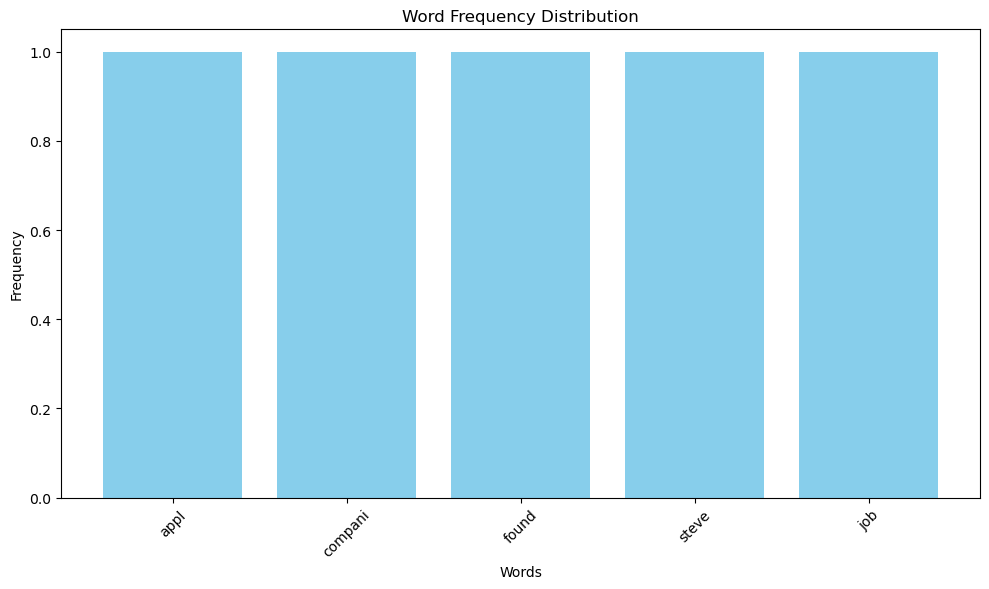

In [38]:
# Visualize word frequency
visualize_word_frequency(processed_text)